<a href="https://colab.research.google.com/github/ReefAmarin/GoogleRecaptchav3-example-In-asp.net/blob/master/WalkThrough_Assignment_3_Eval_Finance_TimeSeris_REEF_AMARIN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Do the following process 
* Install the `yfinance`
* import yfinance
* use `download('MSFT', start = '2012-01-01', end='2020-01-01')`
* Find the difference between Open and close prices
* Add the new Feature using eval
* Exclude weedays using `Resample` over BD
* Apply Grouping over Day to find what Day has best
* Generate similar figures!

2- re-do the previous considering:

```
use download('MSFT', start = '1990-01-01', end='2021-01-01')

```

3- Compare your results while considering more extensive time frame 

4- Use the seaborn to visualise both datasets as in the given Code+Figure






In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 5.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=d7897726fe894f3eaa6dccbaa5ee8720394807ac255f4f3e422cdaf869a182de
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
df=yf.download('MSFT', start = '2012-01-01', end='2020-01-01')
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.749044,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,22.260885,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.488358,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.837715,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.537107,59706800
...,...,...,...,...,...,...
2019-12-24,157.479996,157.710007,157.119995,157.380005,155.014450,8989200
2019-12-26,157.559998,158.729996,157.399994,158.669998,156.285065,14520600
2019-12-27,159.449997,159.550003,158.220001,158.960007,156.570709,18412800


In [79]:
df_2=yf.download('MSFT', start = '1990-01-01', end='2021-01-01')
df_2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.390554,53035200
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.392754,113774400
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.404306,125740800
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.394405,69566400
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.400455,58982400
...,...,...,...,...,...,...
2020-12-24,221.419998,223.610001,221.199997,222.750000,221.726166,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,223.925995,17933500
2020-12-29,226.309998,227.179993,223.580002,224.149994,223.119720,17403200


In [80]:
from dateutil import parser
df['difference']=eval("df['Close'] - df['Open']")
df


,Open,High,Low,Close,Adj Close,Volume,difference2
Date,,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.390554,53035200,NaN
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.392754,113774400,NaN
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.404306,125740800,NaN
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.394405,69566400,NaN
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.400455,58982400,NaN
...,...,...,...,...,...,...,...
2020-12-24,221.419998,223.610001,221.199997,222.750000,221.726166,10550600,NaN
2020-12-28,224.449997,226.029999,223.020004,224.960007,223.925995,17933500,NaN
2020-12-29,226.309998,227.179993,223.580002,224.149994,223.119720,17403200,NaN


In [81]:
df_2['difference2']=eval("df_2['Close'] - df['Open']")
df_2

,Open,High,Low,Close,Adj Close,Volume,difference2
Date,,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.390554,53035200,NaN
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.392754,113774400,NaN
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.404306,125740800,NaN
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.394405,69566400,NaN
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.400455,58982400,NaN
...,...,...,...,...,...,...,...
2020-12-24,221.419998,223.610001,221.199997,222.750000,221.726166,10550600,NaN
2020-12-28,224.449997,226.029999,223.020004,224.960007,223.925995,17933500,NaN
2020-12-29,226.309998,227.179993,223.580002,224.149994,223.119720,17403200,NaN


In [31]:
weekly=df.resample('W').sum()
weekly

,Open,High,Low,Close,Adj Close,Volume,difference
Date,,,,,,,
2012-01-08,108.279999,110.349998,107.990002,109.960001,89.336002,300784500,1.680002
2012-01-15,139.210001,140.500000,138.280001,139.549999,113.376125,294870500,0.339998
2012-01-22,113.689999,115.230000,112.920000,114.320000,92.878242,377212300,0.630001
2012-01-29,147.150000,148.400002,146.170000,147.359999,119.721289,280303600,0.209999
2012-02-05,148.459999,149.940001,147.619999,149.220001,121.232441,263158900,0.760002
...,...,...,...,...,...,...,...
2019-12-08,750.480011,753.629990,743.919998,750.389999,739.111069,103331700,-0.090012
2019-12-15,758.549988,764.300003,755.850006,761.960007,750.507172,100477600,3.410019
2019-12-22,776.210007,781.350006,773.489990,777.710007,766.020447,152135400,1.500000


In [82]:
weekly=df_2.resample('W').sum()
weekly

,Open,High,Low,Close,Adj Close,Volume,difference2
Date,,,,,,,
1990-01-07,2.482640,2.520833,2.450520,2.496528,1.582018,362116800,0.0
1990-01-14,3.085937,3.131945,3.026909,3.073783,1.947818,477734400,0.0
1990-01-21,3.084201,3.178820,3.053821,3.135416,1.986874,631771200,0.0
1990-01-28,3.159722,3.192709,3.106771,3.144096,1.992374,668217600,0.0
1990-02-04,3.199653,3.243055,3.173611,3.213543,2.036381,401716800,0.0
...,...,...,...,...,...,...,...
2020-12-06,1072.320007,1079.310013,1063.819992,1074.250015,1069.312378,137480700,0.0
2020-12-13,1065.320007,1074.119995,1056.560013,1065.879990,1060.980820,138057400,0.0
2020-12-20,1081.479996,1092.320007,1073.780014,1085.619995,1080.630112,186693000,0.0


In [76]:
by_weekday = df.groupby(df.index.weekday).mean()
by_weekday


,Open,High,Low,Close,Adj Close,Volume,difference
Date,,,,,,,
0,64.120897,64.621425,63.578602,64.127203,59.716982,3.181305e+07,0.006306
1,63.840364,64.327548,63.290461,63.835413,59.434415,3.286065e+07,-0.004951
2,63.348784,63.868102,62.799319,63.378200,58.981566,3.340533e+07,0.029416
3,63.465432,64.000617,62.943111,63.530025,59.131338,3.410224e+07,0.064592
4,64.066346,64.578593,63.472469,64.049679,59.649131,3.983375e+07,-0.016667


In [83]:
by_weekday_2 = df_2.groupby(df_2.index.weekday).mean()
by_weekday_2

,Open,High,Low,Close,Adj Close,Volume,difference2
Date,,,,,,,
0,36.925016,37.344626,36.531942,36.964392,31.300984,5.482036e+07,0.006306
1,36.953715,37.349665,36.543520,36.941801,31.275177,5.779655e+07,-0.004951
2,36.881958,37.291955,36.481479,36.900632,31.215601,5.901254e+07,0.029416
3,36.977613,37.391625,36.574764,36.994629,31.316867,5.893842e+07,0.064592
4,36.870697,37.243472,36.429513,36.849562,31.181018,6.145460e+07,-0.016667


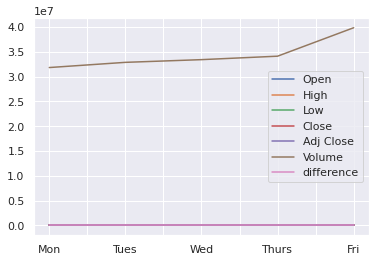

In [77]:
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
by_weekday.plot();

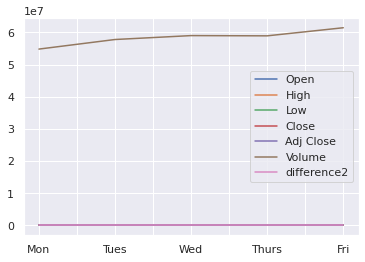

In [84]:
by_weekday_2.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
by_weekday_2.plot();

Text(0.5, 1.0, 'Grouping over Week-Days from 2012-2020 [difference]')

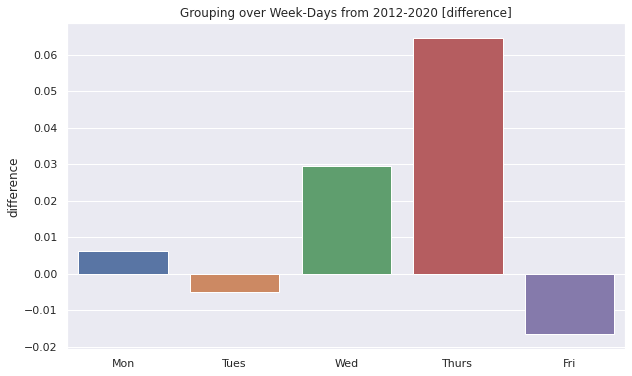

In [78]:
f, ax = plt.subplots(figsize = (10,6))
sns.set_color_codes('pastel')
sns.barplot(x=by_weekday.index, y='difference', data = by_weekday).set_title("Grouping over Week-Days from 2012-2020 [difference]")

Text(0.5, 1.0, 'Grouping over Week-Days from 1990-2020 [difference2]')

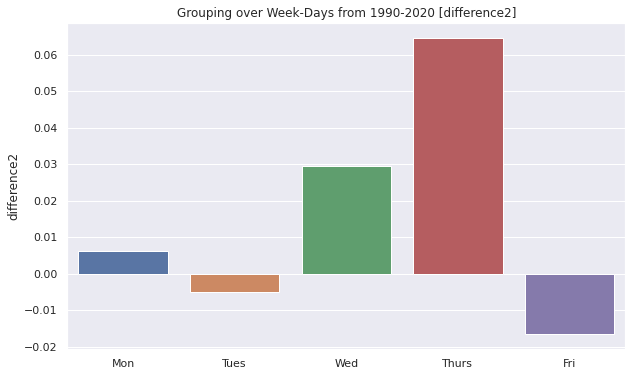

In [87]:
f, ax = plt.subplots(figsize = (10,6))
sns.set_color_codes('pastel')
sns.barplot(x=by_weekday_2.index, y='difference2', data = by_weekday_2).set_title("Grouping over Week-Days from 1990-2020 [difference2]")

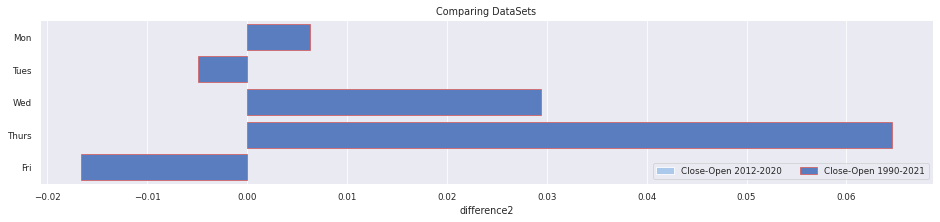

In [88]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (16,3))
sns.set_color_codes('pastel')
sns.barplot(x = by_weekday.difference, y = by_weekday.index, data = by_weekday,
            label = 'Close-Open 2012-2020', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = by_weekday_2.difference2, y = by_weekday_2.index, data = by_weekday_2,
            label = 'Close-Open 1990-2021', color = 'b', edgecolor = 'r').set_title("Comparing DataSets")
ax.legend(ncol = 2, loc = 'lower right')
plt.show()